In [9]:
#Visual story telling part 1: green buildings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('C:\\Users\\Brandon Lewis\\Downloads\\greenbuildings.csv')
print(data)

      CS_PropertyID  cluster     size  empl_gr    Rent  leasing_rate  stories  \
0            379105        1   260300     2.22   38.56         91.39       14   
1            122151        1    67861     2.22   28.57         87.14        5   
2            379839        1   164848     2.22   33.31         88.94       13   
3             94614        1    93372     2.22   35.00         97.04       13   
4            379285        1   174307     2.22   40.69         96.58       16   
...             ...      ...      ...      ...     ...           ...      ...   
7889         157117     1230  1300000     1.15  137.51        100.00       41   
7890         158379     1230    16140     1.15  152.73         75.22        8   
7891          52316     1230    15726     1.15  158.92        100.00        6   
7892         158124     1230    51300     1.15  198.99        100.00       12   
7893         157086     1230  1876972     1.15  250.00         99.84       45   

      age  renovated  class

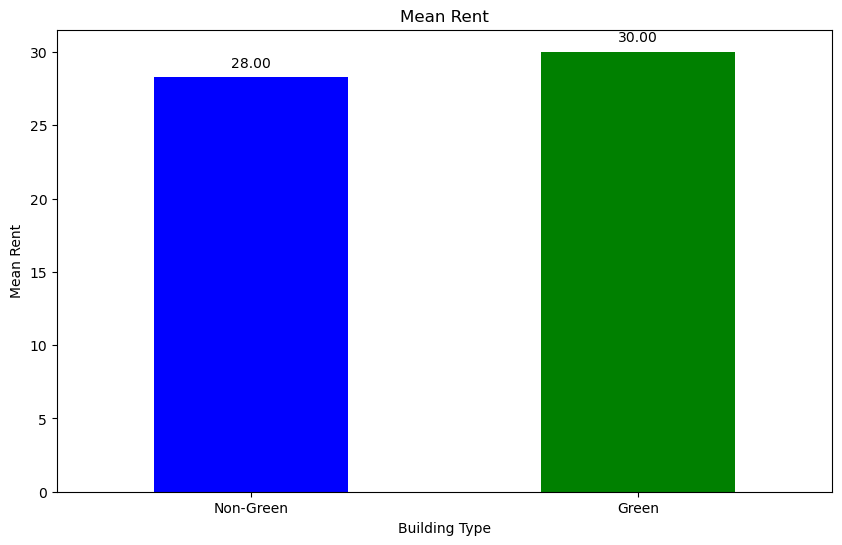

In [10]:
rent_mean = data.groupby('green_rating')['Rent'].mean()

plt.figure(figsize=(10, 6))
ax = rent_mean.plot(kind='bar', color=['blue', 'green'])
plt.title('Mean Rent')
plt.xlabel('Building Type')
plt.ylabel('Mean Rent')
plt.xticks([0, 1], ['Non-Green', 'Green'], rotation=0)
for i, v in enumerate(rent_mean):
    ax.text(i, v + 0.5, f"{int(v):.2f}", ha='center', va='bottom', fontsize=10, color='black')
plt.show()

In [11]:
#We agree with the inital analysis of green buildings charging a higher median rent than non-green buildings. In our analysis of the data, we did not exclude low occupancy buildings like the stats guru did, however the bar plot above shows that green buildings still charge $30 in rent per square foot per year. Non-Green buidlings charge $28 in rent per square feet per year which is still $2 less than green buildings. This insight supports the claim that green buildings can generate more revenue over time from their occupants than non-green buildings.

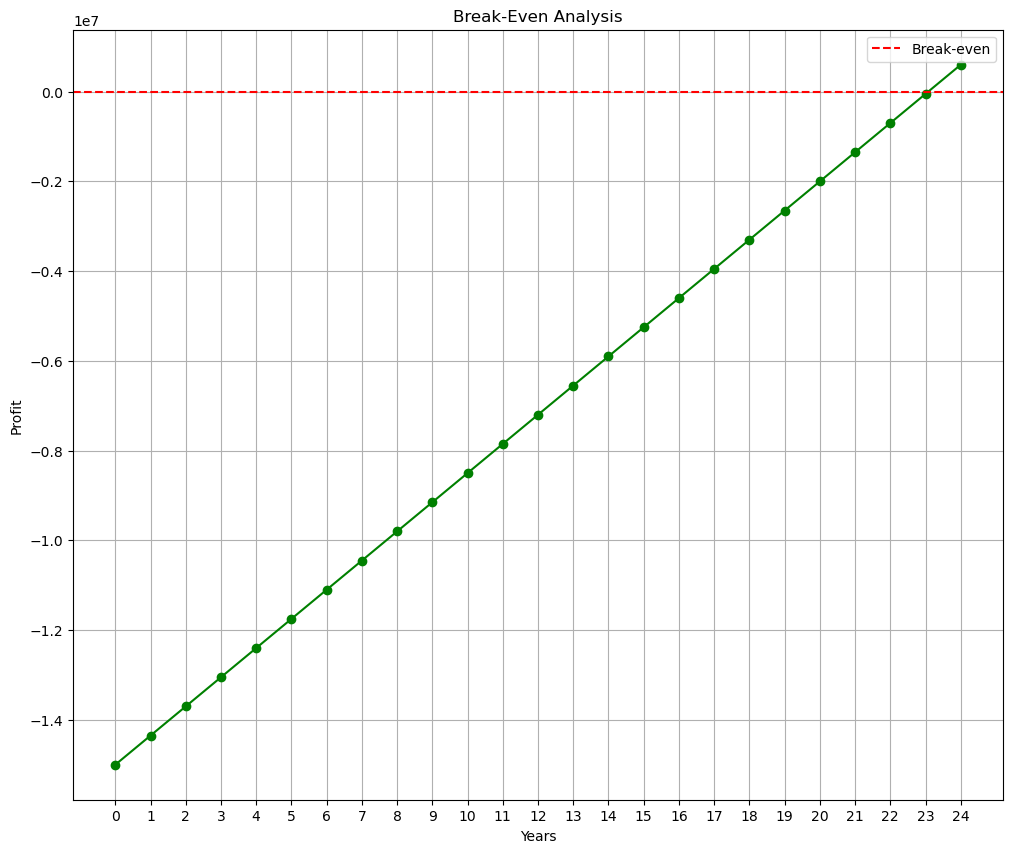

In [12]:
extra_cost = 5000000 + 10000000
extra_revenue = 650000  

break_even_year = np.arange(0, 25)
total_revenue = extra_revenue * break_even_year
total_costs = extra_cost * np.ones_like(break_even_year)
profit = total_revenue - total_costs


plt.figure(figsize=(12, 10))
plt.plot(break_even_year, profit, marker='o', linestyle='-', color='green')
plt.axhline(0, color='red', linestyle='--', label='Break-even')
plt.title('Break-Even Analysis')
plt.xlabel('Years')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.xticks(break_even_year)
plt.show()

In [13]:
#We built on the stats guru's work where they identified that with a new building of 250,000 square feet would bring in $65,0000 of extra revenue per year. The work that the guru did is correct, however we believe they forgot to inlude the $100,000,000 investment into a new buidling, in addition to the green certification premium. That said, we see that the break even year is about 23 years after occupants fill the building. That is also with the assumption that the building will be 100% occupied during that time. We highly advise the real-estate development team to consider this timeframe as this would be quite a long term investment. 

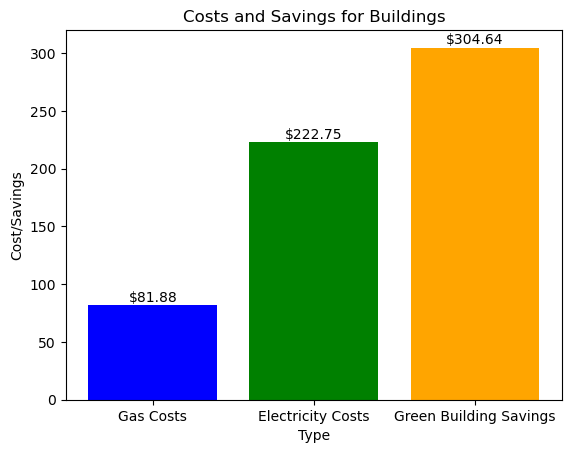

In [14]:
other_buildings = data[data['green_rating'] == 0]

total_gas_costs = other_buildings['Gas_Costs'].sum()
total_electricity_costs = other_buildings['Electricity_Costs'].sum()
total_savings = total_gas_costs + total_electricity_costs

categories = ['Gas Costs', 'Electricity Costs', 'Green Building Savings']
values = [total_gas_costs, total_electricity_costs, total_savings]

ax = plt.bar(categories, values, color=['blue', 'green', 'orange'])
plt.xlabel('Type')
plt.ylabel('Cost/Savings')
plt.title('Costs and Savings for Buildings')
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"${v:.2f}", ha='center', va='bottom', fontsize=10, color='black')
plt.show()

In [15]:
#We wanted to display how chossing to fund a green building instead of a non-green buidling would save costs on gas and electricty, as this may be a factor our investors are interested in. It should be noted that the data doesn't specify the units of measurement for gas/electricity costs. If the dataset shows a daily cost, then electing to proceed with a green building would save over $111,000 annually.